In [4]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import io
import cv2
from matplotlib.offsetbox import (TextArea, DrawingArea, OffsetImage, AnnotationBbox)

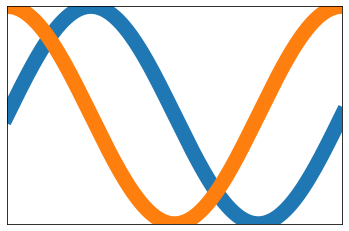

In [5]:
mpl.rcParams["axes.xmargin"] = 0
mpl.rcParams["axes.ymargin"] = 0

t = np.linspace(0, 2*np.pi, 500)
plt.plot(t,np.sin(t),linewidth=15)
plt.plot(t,np.cos(t),linewidth=15)

buf = io.BytesIO()

ax = plt.gca()
ax.tick_params(labelbottom=False,
               labelleft=False,
               labelright=False,
               labeltop=False)

ax.tick_params(bottom=False,
               left=False,
               right=False,
               top=False)


plt.savefig(buf, format="png")

enc = np.frombuffer(buf.getvalue(), dtype=np.uint8)
dst0 = cv2.imdecode(enc, 1)
dst0 = dst0[:,:,::-1]

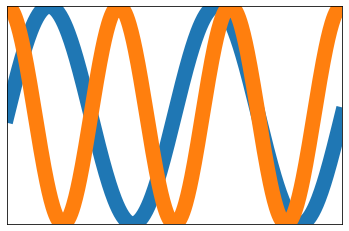

In [6]:
t = np.linspace(0, 2*np.pi, 500)
plt.plot(t,np.sin(2*t),linewidth=15)
plt.plot(t,np.cos(3*t),linewidth=15)

buf = io.BytesIO()

ax = plt.gca()
ax.tick_params(labelbottom=False,
               labelleft=False,
               labelright=False,
               labeltop=False)

ax.tick_params(bottom=False,
               left=False,
               right=False,
               top=False)


plt.savefig(buf, format="png")

enc = np.frombuffer(buf.getvalue(), dtype=np.uint8)
dst1 = cv2.imdecode(enc, 1)
dst1 = dst1[:,:,::-1]

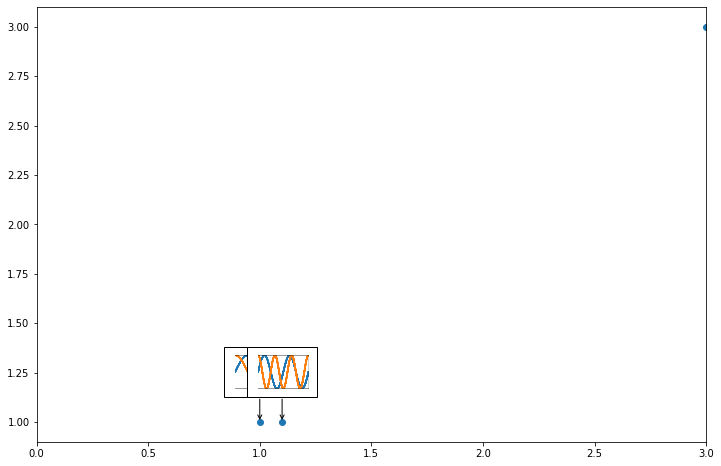

In [8]:
mpl.rcParams["axes.xmargin"] = 0.05
mpl.rcParams["axes.ymargin"] = 0.05

x = [1,1.1,3]
y = [1,1,3]

fig, ax = plt.subplots(figsize=(12,8))

ax.scatter(x,y)
ax.set_xlim([0,3])

imb0 = OffsetImage(dst0, zoom=0.15)
imb0.image.axes = ax
ab0 = AnnotationBbox(imb0,(x[0],y[0]), xybox=(0,50), xycoords="data", boxcoords="offset points", pad=0.3, arrowprops=dict(arrowstyle="->"))
ax.add_artist(ab0)

imb1 = OffsetImage(dst1, zoom=0.15)
imb1.image.axes = ax
ab1 = AnnotationBbox(imb1,(x[1],y[1]), xybox=(0,50), xycoords="data", boxcoords="offset points", pad=0.3, arrowprops=dict(arrowstyle="->"))
ax.add_artist(ab1)